# Анализ влияния условий труда на утомляемость сотрудников и её прогнозирование

In [ ]:
# Импорт необходимых библиотек языка Python
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
# Загрузка ДатаСета
df_hr = pd.read_csv('/content/HR-Employee-Attrition.csv')

## Разведочный анализ

In [ ]:
# Просмотр информации о таблице и её значениях
df_hr.info()
df_hr.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeNumber                     1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,15.209524,2.712245,0.793878,11.268707,2.799320,2.761224,6.941497,4.229252,2.080272,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,3.659938,1.081209,0.852077,7.734219,1.289271,0.706476,5.810308,3.623137,2.873381,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,18.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,25.000000,4.000000,3.000000,33.000000,6.000000,4.000000,23.000000,18.000000,10.000000,17.000000


Построение гистограмм для выявления зависимостей

<BarContainer object of 1470 artists>

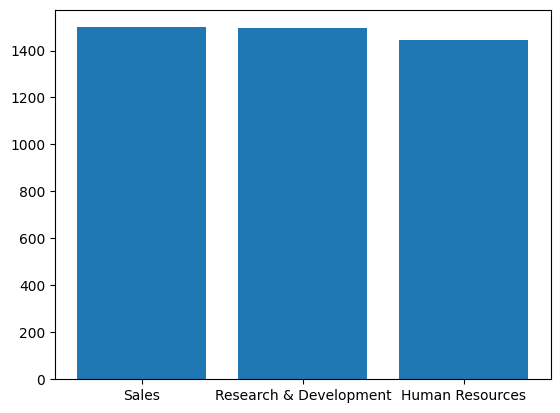

In [ ]:
# Признаки относительно отдела сотрудника
plt.bar(df_hr['Department'], df_hr['EducationField'])
plt.bar(df_hr['Department'], df_hr['PercentSalaryHike'])
plt.bar(df_hr['Department'], df_hr['DailyRate'])
plt.bar(df_hr['Department'], df_hr['JobSatisfaction'])

<BarContainer object of 1470 artists>

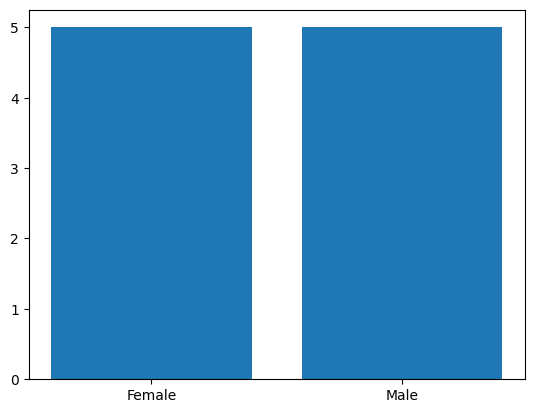

In [ ]:
# Признаки относительно пола сотрудника
plt.bar(df_hr['Gender'], df_hr['JobLevel'])
plt.bar(df_hr['Gender'], df_hr['PercentSalaryHike'])
plt.bar(df_hr['Gender'], df_hr['DailyRate'])
plt.bar(df_hr['Gender'], df_hr['JobSatisfaction'])

<BarContainer object of 1470 artists>

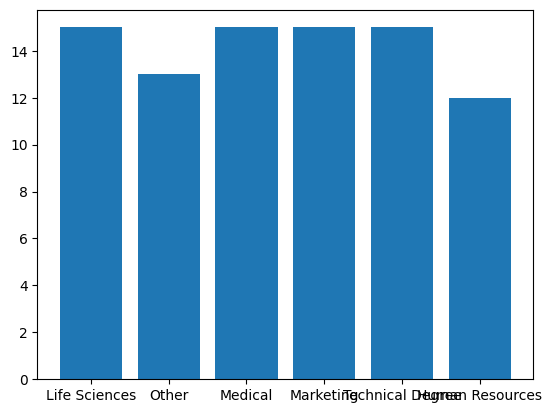

In [ ]:
# Признаки относительно образования сотрудника
plt.bar(df_hr['EducationField'], df_hr['JobLevel'])
plt.bar(df_hr['EducationField'], df_hr['PercentSalaryHike'])
plt.bar(df_hr['EducationField'], df_hr['MonthlyIncome'])
plt.bar(df_hr['EducationField'], df_hr['YearsSinceLastPromotion'])

<BarContainer object of 1470 artists>

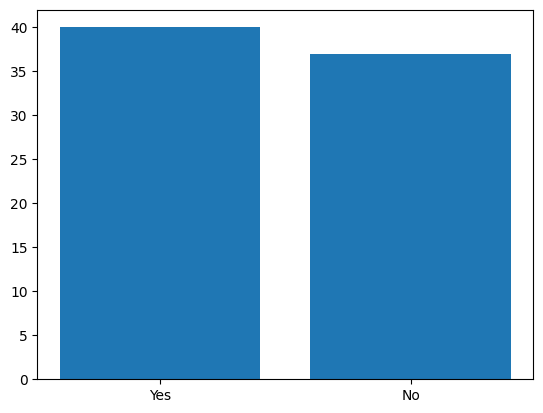

In [ ]:
# Признаки относительно утомляемости сотрудника
plt.bar(df_hr['Attrition'], df_hr['YearsAtCompany'])
plt.bar(df_hr['Attrition'], df_hr['WorkLifeBalance'])

In [ ]:
# Удаление не значимых столбцов
del df_hr['EmployeeCount']
del df_hr['Over18']
del df_hr['StandardHours']
del df_hr['PerformanceRating']

## Предобработка данных

In [ ]:
# Обработка дубликатов
df_hr.drop_duplicates()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,11,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,15,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,17,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,15,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,20,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,14,4,0,17,3,2,9,6,0,8


In [ ]:
# Исходя из команды .info(), пропусков не обнаружено

# Можно заметить, что максимальные значения некоторых столбцов имеют сильное отклонение от среднего значения по столбцу. С помощью диаграмм размаха проверим распределение

df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,15.209524,2.712245,0.793878,11.279592,2.799320,2.761224,7.068027,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,3.659938,1.081209,0.852077,7.780782,1.289271,0.706476,6.169558,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,18.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,25.000000,18.000000,15.000000,17.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x78ce1461d690>,
 'caps': [<matplotlib.lines.Line2D at 0x78ce1461ed10>,
 'boxes': [<matplotlib.lines.Line2D at 0x78ce1461cc50>],
 'medians': [<matplotlib.lines.Line2D at 0x78ce146282d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78ce14628d90>],
 'means': []}

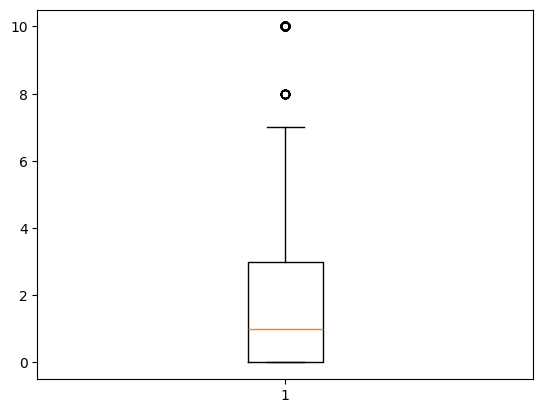

In [ ]:
plt.boxplot(df_hr['DistanceFromHome'])
plt.boxplot(df_hr['YearsAtCompany'])
plt.boxplot(df_hr['YearsSinceLastPromotion'])
plt.boxplot(df_hr['TotalWorkingYears'])
plt.boxplot(df_hr['YearsInCurrentRole'])
plt.boxplot(df_hr['YearsWithCurrManager'])
plt.show()

In [ ]:
# Сильные выбросы обнаружены в столбцах YearsAtCompany, YearsSinceLastPromotion и TotalWorkingYears: заменим их на минимальное значение выброса
df_hr.loc[df_hr['YearsAtCompany'] >= 20, 'YearsAtCompany'] = 23
df_hr.loc[df_hr['YearsSinceLastPromotion'] >= 9, 'YearsSinceLastPromotion'] = 10
df_hr.loc[df_hr['TotalWorkingYears'] >= 30, 'TotalWorkingYears'] = 33

In [ ]:
# Обработка категориальных признаков
df_hr = pd.get_dummies(df_hr)

In [ ]:
# Проверка корреляций
df_hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185,-0.028062,0.028062
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835,-0.009135,0.009135
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445,-0.025514,0.025514
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168,0.020322,-0.020322
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.014350,-0.013983,-0.017686,0.023263,0.006255,-0.025149,0.053933,-0.035189,0.024037,-0.024037
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035,-0.070132,0.070132
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436,0.007782,-0.007782
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.021939,0.015200,0.047604,-0.011413,-0.027282,0.016815,0.028324,-0.045253,0.003507,-0.003507
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,0.114896,0.414319,-0.387788,0.127490,-0.216559,0.037087,0.050547,-0.087072,-0.000544,0.000544
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,-0.013747,-0.006217,0.020503,0.012604,0.001413,-0.015197,-0.010315,0.024571,-0.024539,0.024539


## Проверка статистических гипотез

Нулевая гипотеза:
Доли сотрудников с положительным значением утомляемости равны для тех, кто работает в компании больше и меньше 30-ти лет.
Альтернативная гипотеза:
Разница между долями статистически значимая.
Уровень значимости: 0,05
Метод: t-test (так как выборки небольшие)

In [ ]:
# Разделение столбца Attrition по стажу работы в компании
less_thr = df_hr.Attrition[df_hr['YearsAtCompany'] <= 30]
more_thr = df_hr.Attrition[df_hr['YearsAtCompany'] > 30]

# Преобразование строчных значений в бинарные
less_map = {'Yes': 1, 'No': 0}
less_thr = less_thr.map(less_map)

more_map = {'Yes': 1, 'No': 0}
more_thr = more_thr.map(more_map)

# Рассчёт конверсии
conversion_less = np.mean(less_thr)
len_less = len(less_thr)

conversion_more = np.mean(more_thr)
len_more = len(more_thr)

In [ ]:
# Рассчёт р и t-теста с помощью библиотеки scipy.stats
t_stat, p_value = stats.ttest_ind(less_thr, more_thr)
# Значение р
p_value

0.33191336976624186

Значение р выше уровня значимости - подтверждена нулевая гипотеза

## Построение моделей машинного обучения

In [ ]:
# Импорт необходимых библиотек
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score, accuracy_score

In [ ]:
# Разделение на тренировочную и тестовую выборки
X = df_hr.drop('Attrition_Yes', axis=1)
Y = df_hr['Attrition_Yes']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

In [ ]:
# Логистическая регрессия
l_r = LogisticRegression()
l_r.fit(x_train, y_train)
lr_pred = l_r.predict(x_test)

r2_score(y_test, lr_pred), accuracy_score(y_test, lr_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.16326530612244897,
 0.16326530612244897,
 -0.19512195121951215,
 0.8367346938775511)

In [ ]:
# Дерево решений
d_t = DecisionTreeClassifier()
d_t.fit(x_train, y_train)
dt_pred = d_t.predict(x_test)

r2_score(y_test, dt_pred), accuracy_score(y_test, dt_pred)

(0.0, 0.0, 1.0, 1.0)

In [ ]:
# KNN
knn = KNeighborsClassifier(2) # n_neighbours
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

 r2_score(y_test, knn_pred), accuracy_score(y_test, knn_pred)

(0.18027210884353742,
 0.18027210884353742,
 -0.31961382113821135,
 0.8197278911564626)

In [ ]:
# Случайный лес
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

r2_score(y_test, rf_pred), accuracy_score(y_test, rf_pred)

(0.0, 0.0, 1.0, 1.0)

In [ ]:
# Градиентный бустинг
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)

r2_score(y_test, gb_pred), accuracy_score(y_test, gb_pred)

(0.0, 0.0, 1.0, 1.0)

In [ ]:
ml_result = {'Модель': ['Логистическая регрессия', 'Дерево решений', 'KNN', 'Случайный лес', 'Градиентный бустинг'], 'Точность': [accuracy_score(y_test, lr_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, knn_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, gb_pred)], 'R2': [r2_score(y_test, lr_pred), r2_score(y_test, dt_pred), r2_score(y_test, knn_pred), r2_score(y_test, rf_pred), r2_score(y_test, gb_pred)]}

pd.DataFrame(ml_result)

## Сохранение лучшей модели с помощью pickle

In [ ]:
import pickle

In [ ]:
with open('desiciontree.pickle', 'wb') as f:
  pickle.dump(d_t, f)